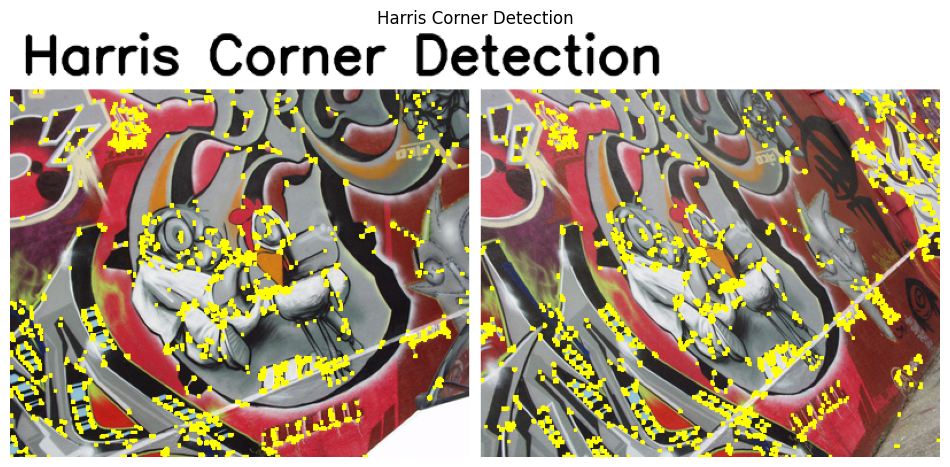

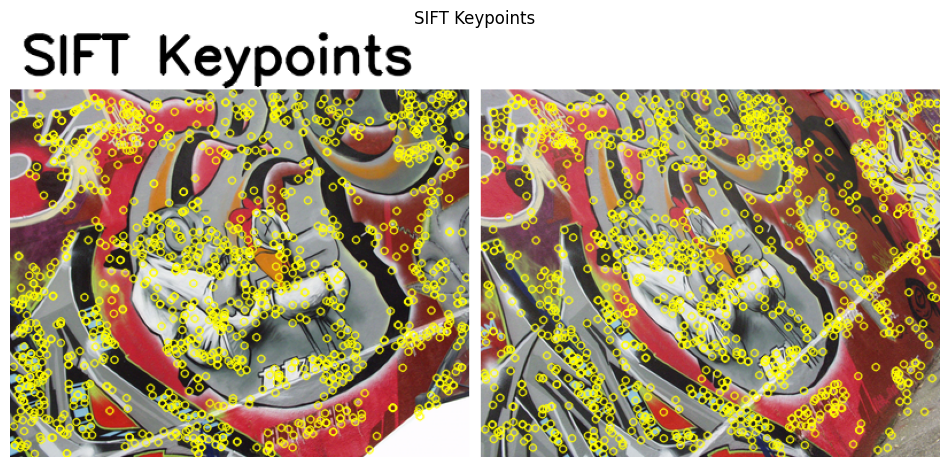

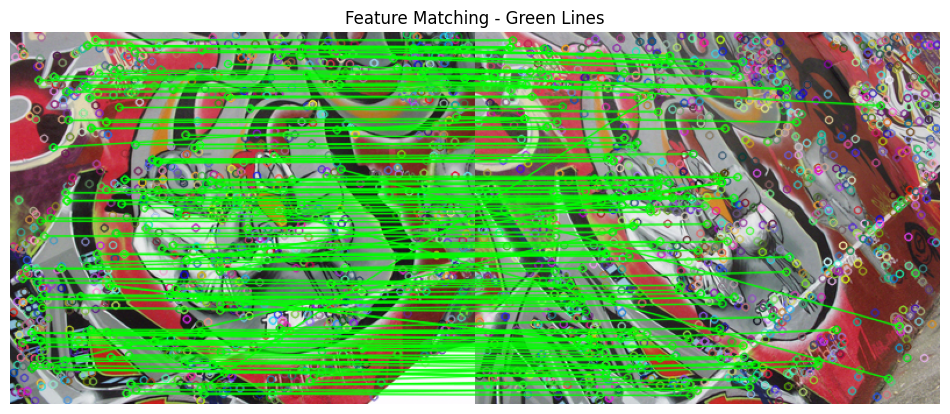

True

In [7]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images in color (BGR format)
img1 = cv2.imread('img2.png')
img2 = cv2.imread('img4.png')

# Function to add a header text above concatenated images
def add_header_text(image, header_text):
    font = cv2.FONT_HERSHEY_SIMPLEX
    header = np.full((50, image.shape[1], 3), 255, dtype=np.uint8)  
    cv2.putText(header, header_text, (10, 35), font, 1.5, (0, 0, 0), 3, cv2.LINE_AA)  
    combined = cv2.vconcat([header, image])  
    return combined

# Harris Corner Detection
def harris_corner_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    image[dst > 0.01 * dst.max()] = [0, 255, 255]  
    return image

# Apply Harris Corner Detection on each image
keypoint_img1 = harris_corner_detection(img1.copy())
keypoint_img2 = harris_corner_detection(img2.copy())


height = max(keypoint_img1.shape[0], keypoint_img2.shape[0])
separator = 255 * np.ones((height, 10, 3), dtype=np.uint8)  
harris_concat = cv2.hconcat([keypoint_img1, separator, keypoint_img2])
harris_with_header = add_header_text(harris_concat, "Harris Corner Detection")

# Convert to RGB for display
harris_with_header_rgb = cv2.cvtColor(harris_with_header, cv2.COLOR_BGR2RGB)

# Display Harris Corner Detection result with header
plt.figure(figsize=(12, 6))
plt.imshow(harris_with_header_rgb)
plt.title("Harris Corner Detection")
plt.axis('off')
plt.show()

# SIFT Keypoint Detection
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

img_with_keypoints1 = cv2.drawKeypoints(img1, keypoints1, None, color=(0, 255, 255))
img_with_keypoints2 = cv2.drawKeypoints(img2, keypoints2, None, color=(0, 255, 255))

# Concatenate SIFT Keypoints results with separator
sift_concat = cv2.hconcat([img_with_keypoints1, separator, img_with_keypoints2])
sift_with_header = add_header_text(sift_concat, "SIFT Keypoints")

# Convert to RGB for display
sift_with_header_rgb = cv2.cvtColor(sift_with_header, cv2.COLOR_BGR2RGB)

# Display SIFT Keypoints result with header
plt.figure(figsize=(12, 6))
plt.imshow(sift_with_header_rgb)
plt.title("SIFT Keypoints")
plt.axis('off')
plt.show()

# Feature Matching using Sum of Squared Differences (SSD) and Ratio Distance
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test
good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

matched_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, matchColor=(0, 255, 0))

# Convert to RGB for display
matched_img_rgb = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

# Display Feature Matching result
plt.figure(figsize=(12, 6))
plt.imshow(matched_img_rgb)
plt.title("Feature Matching - Green Lines")
plt.axis('off')
plt.show()

# Save the labeled and headered outputs
cv2.imwrite('S20220010126_FDDM_output1.png', harris_with_header)
cv2.imwrite('S20220010126_FDDM_output2.png', sift_with_header)
cv2.imwrite('S20220010126_FDDM_output3.png', matched_img)
